In [232]:
# Spring 2022
# IE7275- Data Mining in Engineering
# Project Group 24
# Authors - Samruddhi Kulkarni
#           Karthik Vadlamani

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [233]:
# Importing the csv file of the dataset
stroke_df = pd.read_csv("C:/Sam/Sem2/Data mining/Project/Healthcare dataset/archive/healthcare-dataset-stroke-data.csv")
print(stroke_df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [234]:
# Printing the descriptive statistics of the dataset
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [235]:
# Printing the information of column name and datatype
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [236]:
# Checking for null values in the dataset
stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [237]:
# We see that bmi has 201 NA rows, which we can fill with median values
stroke_df['bmi'].fillna(stroke_df['bmi'].median(), inplace=True)
# Checking again for null values
stroke_df.isna().sum()
# The output confirms all the null values were filled with median values

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [238]:
# Identifying and removing redundant data
# We can drop the id column as it is redundant
stroke_df.drop('id',axis=1,inplace=True)
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [239]:
# Determining unique values of all categorical columns
print(stroke_df.gender.unique())
print(stroke_df.ever_married.unique())
print(stroke_df.work_type.unique())
print(stroke_df.Residence_type.unique())
print(stroke_df.smoking_status.unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [240]:
# From the above categories we can see that the 'Other' category in Gender field has just one entry which we can remove
stroke_df.drop(stroke_df.index[stroke_df['gender'] == 'Other'], inplace = True)
print(stroke_df.gender.unique())

['Male' 'Female']


In [241]:
# Finding duplicate rows in the dataset
duplicate = stroke_df[stroke_df.duplicated()]
 
print("Duplicate Rows :")
duplicate
stroke_df
# From the output it is clear that there are no duplicate data in the dataset

Duplicate Rows :


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


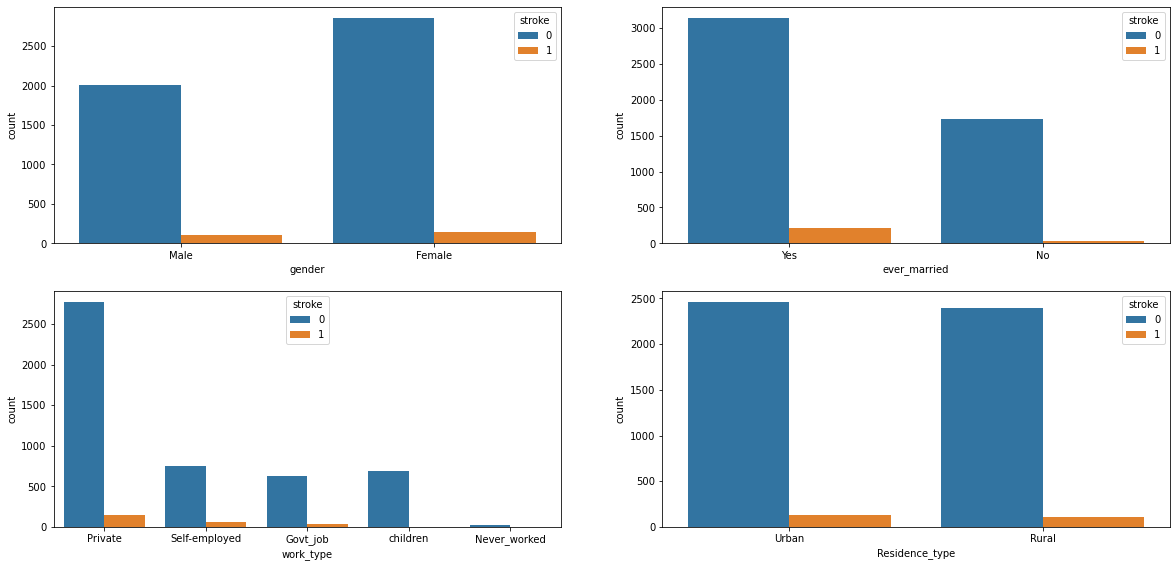

In [242]:
# Plotting barplots of stroke vs categorical fields
categorical = stroke_df.select_dtypes('object').columns
print(categorical)
plt.figure(figsize = (20,20))
i = 1
for column in categorical[:-1]:
    plt.subplot(4, 2, i)
    sns.countplot(x = stroke_df[column], hue = stroke_df["stroke"])
    i+=1
plt.show()

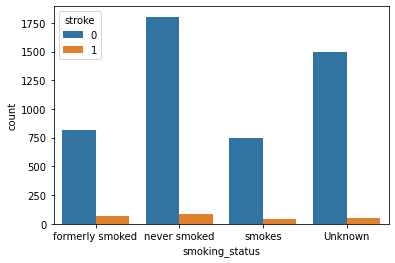

In [243]:
# Plotting barplot of stroke vs smoking_status field
sns.countplot(x = stroke_df["smoking_status"], hue = stroke_df["stroke"])
plt.show()

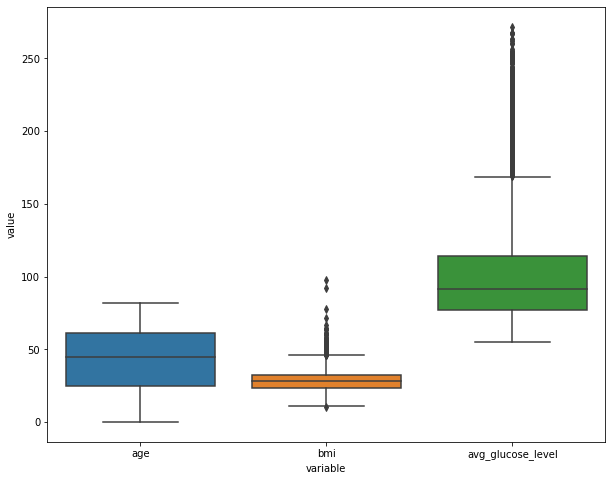

In [244]:
# Plotting boxplots of numerical fields like age, bmi, average glucose level of patients
plt.figure(figsize = (10,8))
df2 = pd.DataFrame(data=stroke_df, columns=["age", "bmi", "avg_glucose_level"])
sns.boxplot(x="variable", y="value", data=pd.melt(df2))
plt.show()

<Figure size 1080x1080 with 0 Axes>

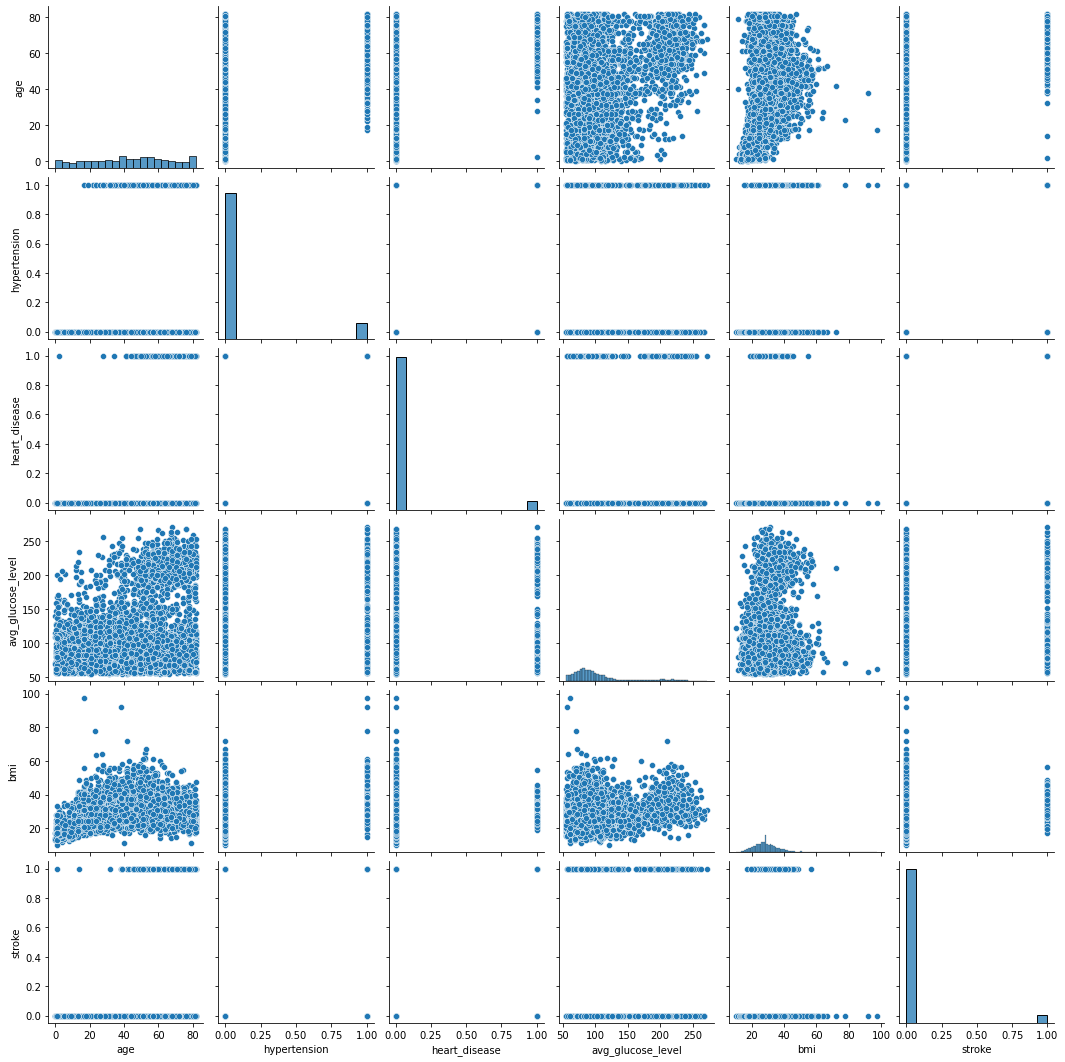

In [245]:
# Plotting pairplots the fields
plt.figure(figsize = (15,15))
sns.pairplot(stroke_df)

In [246]:
!pip install plotly

In [247]:
# Ploting scatterplot of age vs stroke 
import plotly.express as px
plt.figure(figsize = (5,5))
fig = px.scatter( stroke_df, x = 'age', y = 'stroke')
fig.show()

<Figure size 360x360 with 0 Axes>

In [248]:
# Some fields in the dataset have object datatype 
# For applying k-NN to categorical variables, we need to convert them to binary dummy variables
stroke_df.gender = stroke_df.gender.astype('category').cat.codes
stroke_df.ever_married = stroke_df.ever_married.astype('category').cat.codes
stroke_df.Residence_type = stroke_df.Residence_type.astype('category').cat.codes
stroke_df = pd.get_dummies(data=stroke_df, prefix=['work_type','smoking_status'], columns=['work_type','smoking_status'], drop_first=True)
stroke_df.head(10)
#print(stroke_df[['age','bmi','avg_glucose_level']])

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.1,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,1,0,0
6,1,74.0,1,1,1,0,70.09,27.4,1,0,1,0,0,0,1,0
7,0,69.0,0,0,0,1,94.39,22.8,1,0,1,0,0,0,1,0
8,0,59.0,0,0,1,0,76.15,28.1,1,0,1,0,0,0,0,0
9,0,78.0,0,0,1,1,58.57,24.2,1,0,1,0,0,0,0,0


In [249]:
print(stroke_df[['age','bmi','avg_glucose_level']].describe())

               age          bmi  avg_glucose_level
count  5109.000000  5109.000000        5109.000000
mean     43.229986    28.863300         106.140399
std      22.613575     7.699785          45.285004
min       0.080000    10.300000          55.120000
25%      25.000000    23.800000          77.240000
50%      45.000000    28.100000          91.880000
75%      61.000000    32.800000         114.090000
max      82.000000    97.600000         271.740000


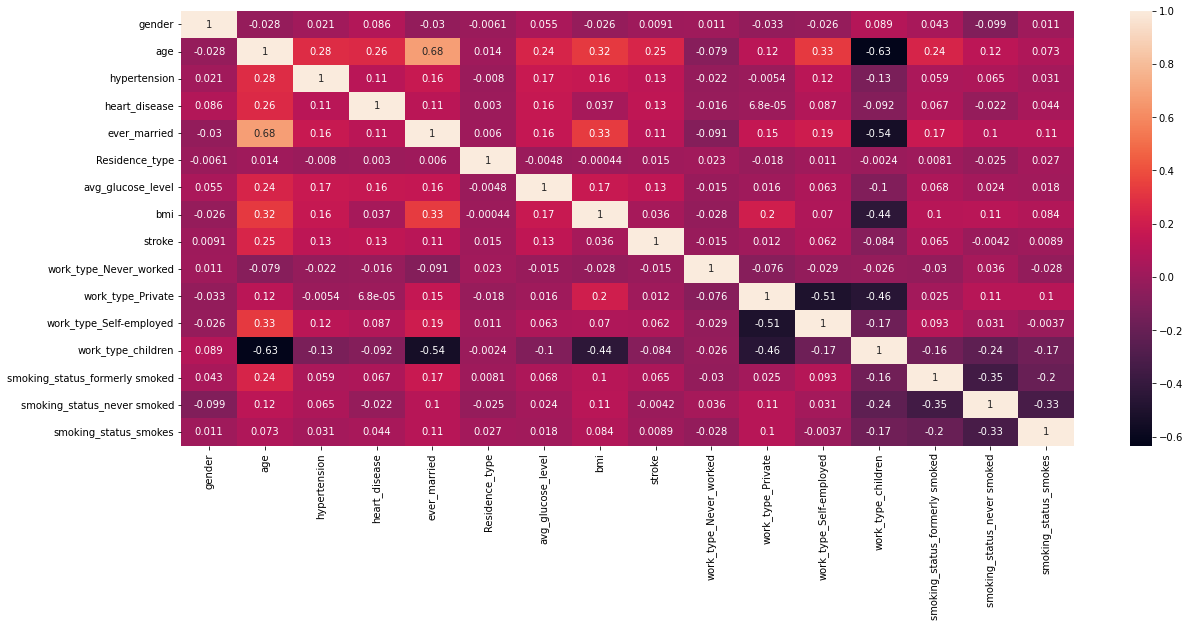

In [278]:
# Plotting heatmap of correlation of fields in the dataset
corrMatrix = stroke_df.corr()
# print (corrMatrix)
plt.figure(figsize=(20,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

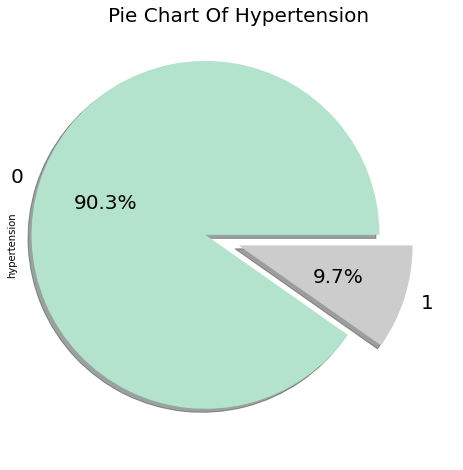

In [251]:
# Pieplot of Hypertension patients distribution
fig, axes = plt.subplots(figsize=(8,8))
stroke_df['hypertension'].value_counts().plot.pie(autopct='%1.1f%%',
                                            colormap='Pastel2',
                                            fontsize=20,
                                            shadow=True,
                                            explode=[0.2,0])
axes.set_title("Pie Chart Of Hypertension", fontsize=20)
axes.set_xlabel(None)
plt.show()

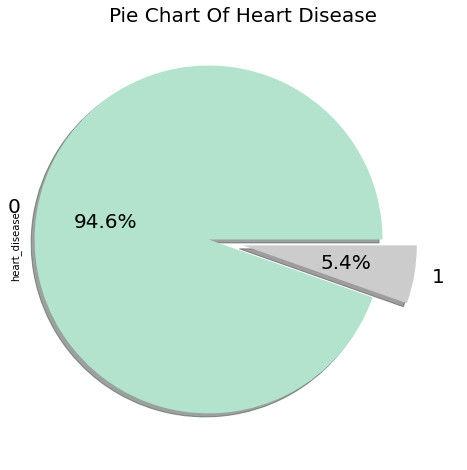

In [252]:
# Pieplot of Heart disease patients distribution
fig, axes = plt.subplots(figsize=(8,8))
stroke_df['heart_disease'].value_counts().plot.pie(autopct='%1.1f%%',
                                            colormap='Pastel2',
                                            fontsize=20,
                                            shadow=True,
                                            explode=[0.2,0])
axes.set_title("Pie Chart Of Heart Disease", fontsize=20)
axes.set_xlabel(None)
plt.show()

In [253]:
#Standardizing the numerical columns
col = ['age','avg_glucose_level', 'bmi']
min_max_scaler = preprocessing.MinMaxScaler()

column_names_to_normalize = ['age','avg_glucose_level', 'bmi']
x = stroke_df[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = stroke_df.index)
stroke_df[column_names_to_normalize] = df_temp
# Verifying the operation through describe function
stroke_df.describe()
print(stroke_df[['age','bmi','avg_glucose_level']].describe())

               age          bmi  avg_glucose_level
count  5109.000000  5109.000000        5109.000000
mean      0.526733     0.212638           0.235529
std       0.276045     0.088199           0.209053
min       0.000000     0.000000           0.000000
25%       0.304199     0.154639           0.102114
50%       0.548340     0.203895           0.169698
75%       0.743652     0.257732           0.272228
max       1.000000     1.000000           1.000000


In [254]:
# Forming feature and target dataframes
X = stroke_df.drop(['stroke'],axis=1)
y = stroke_df['stroke']

In [255]:
# Splitting data as training = 75% and testing = 25% 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [256]:
# transform the dataset by oversampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_oversample, y_oversample = oversample.fit_resample(X, y)
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_oversample, y_oversample, test_size=0.20, random_state=42)


In [257]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

# KNN Classifier before oversampling
results = []
for k in range(1, 40):
 knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
 results.append({'k': k, 'accuracy': accuracy_score(y_test, knn.predict(X_test)) })
# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

# KNN Classifier after oversampling
results1 = []
print('After oversampling')
for k in range(1, 40):
 knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_os, y_train_os)
 results1.append({'k': k, 'accuracy': accuracy_score(y_test_os, knn.predict(X_test_os)) })
# Convert results to a pandas data frame
results1 = pd.DataFrame(results1)
print(results1)


     k  accuracy
0    1  0.904538
1    2  0.935055
2    3  0.928013
3    4  0.938185
4    5  0.937402
5    6  0.938185
6    7  0.937402
7    8  0.938185
8    9  0.938967
9   10  0.938185
10  11  0.938967
11  12  0.937402
12  13  0.938185
13  14  0.937402
14  15  0.937402
15  16  0.937402
16  17  0.937402
17  18  0.937402
18  19  0.937402
19  20  0.937402
20  21  0.937402
21  22  0.937402
22  23  0.937402
23  24  0.937402
24  25  0.937402
25  26  0.937402
26  27  0.937402
27  28  0.937402
28  29  0.937402
29  30  0.937402
30  31  0.937402
31  32  0.937402
32  33  0.937402
33  34  0.937402
34  35  0.937402
35  36  0.937402
36  37  0.937402
37  38  0.937402
38  39  0.937402
After oversampling
     k  accuracy
0    1  0.899691
1    2  0.889918
2    3  0.887346
3    4  0.889403
4    5  0.873971
5    6  0.874486
6    7  0.867284
7    8  0.871399
8    9  0.860597
9   10  0.866255
10  11  0.858539
11  12  0.858025
12  13  0.850309
13  14  0.852366
14  15  0.843621
15  16  0.844136
16  17  0.84

Confusion Matrix - KNN
[[1183   15]
 [  77    3]]


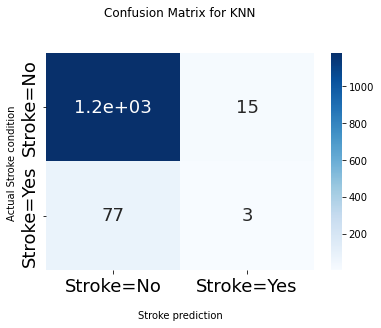

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1198
           1       0.17      0.04      0.06        80

    accuracy                           0.93      1278
   macro avg       0.55      0.51      0.51      1278
weighted avg       0.89      0.93      0.91      1278

AUC for KNN classifier is: 0.5874426126878131


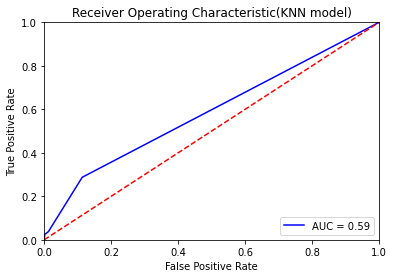

In [258]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn4 = KNeighborsClassifier()
knn4.set_params(n_neighbors = 3)
knn_model = knn4.fit(X_train, y_train)
y_pred_knn = knn4.predict(X_test)
y_pred_knn

# Get the confusion matrix
cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print('Confusion Matrix - KNN')
print(cf_matrix_knn)

cf_matrix_plot = sns.heatmap(cf_matrix_knn, annot=True, cmap='Blues',annot_kws={"fontsize":18})

cf_matrix_plot.set_title('Confusion Matrix for KNN\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

# Ticket labels 
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)

# Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, y_pred_knn))

class_probabilities = knn_model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for KNN classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(KNN model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix - KNN
[[793 183]
 [ 36 932]]


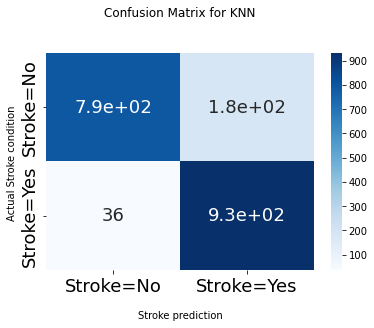

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       976
           1       0.84      0.96      0.89       968

    accuracy                           0.89      1944
   macro avg       0.90      0.89      0.89      1944
weighted avg       0.90      0.89      0.89      1944

AUC for KNN classifier is: 0.9308375177821433


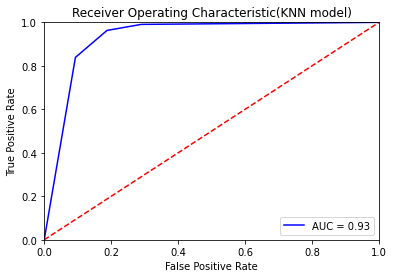

In [259]:
#KNN model performance testing with oversampled data
knn4 = KNeighborsClassifier()
knn4.set_params(n_neighbors = 3)
knn_model = knn4.fit(X_train_os, y_train_os)
y_pred_knn = knn4.predict(X_test_os)
y_pred_knn

# Get the confusion matrix
cf_matrix_knn = confusion_matrix(y_test_os, y_pred_knn)

print('Confusion Matrix - KNN')
print(cf_matrix_knn)

cf_matrix_plot = sns.heatmap(cf_matrix_knn, annot=True, cmap='Blues', annot_kws={"fontsize":18})

cf_matrix_plot.set_title('Confusion Matrix for KNN\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

# Ticket labels 
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)

# Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test_os, y_pred_knn))

class_probabilities = knn_model.predict_proba(X_test_os)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test_os, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for KNN classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(KNN model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [260]:
# Performing Hyper-parameter tuning to find the best model parameter. In case case, finding the best k value using GridSearcgCV
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3,5,7,9,11,13],
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

clf = GridSearchCV(
    estimator=knn,
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)
# Fitting our GridSearchCV Object
clf.fit(X_train, y_train)
# Printing the best parameters
print(clf.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


Confusion Matrix - KNN
[[1195    3]
 [  77    3]]


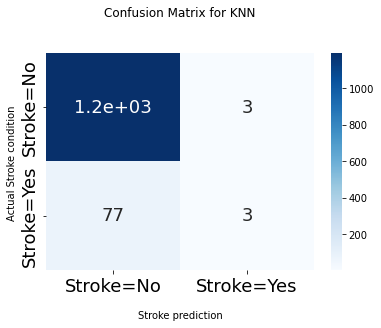

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.50      0.04      0.07        80

    accuracy                           0.94      1278
   macro avg       0.72      0.52      0.52      1278
weighted avg       0.91      0.94      0.91      1278

AUC for KNN classifier is: 0.6586863522537563


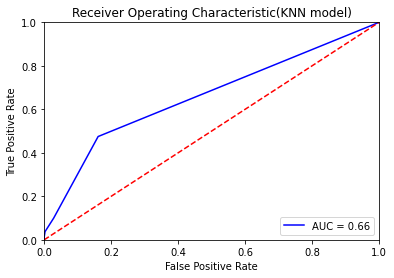

In [261]:
knn4 = KNeighborsClassifier()
knn4.set_params(n_neighbors = 5)
knn_model = knn4.fit(X_train, y_train)
y_pred_knn = knn4.predict(X_test)
y_pred_knn

# Get the confusion matrix
cf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print('Confusion Matrix - KNN')
print(cf_matrix_knn)

cf_matrix_plot = sns.heatmap(cf_matrix_knn, annot=True, cmap='Blues',annot_kws={"fontsize":18})

cf_matrix_plot.set_title('Confusion Matrix for KNN\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

# Ticket labels 
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)

# Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, y_pred_knn))

class_probabilities = knn_model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for KNN classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(KNN model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [262]:
# !pip install imbalanced-learn

Confusion Matrix - LRC
[[1198    0]
 [  79    1]]


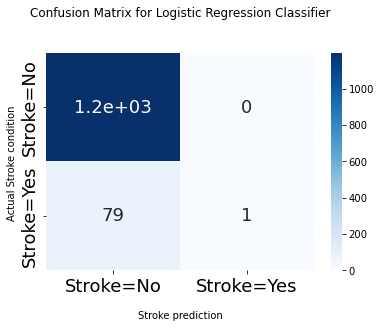

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       1.00      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.97      0.51      0.50      1278
weighted avg       0.94      0.94      0.91      1278

AUC for Logistic Regression classifier is: 0.8351106010016695


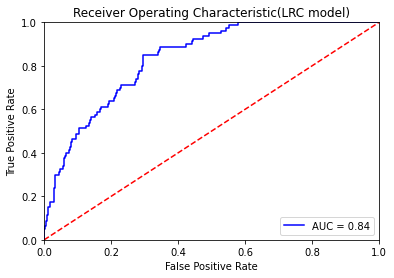

In [263]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression
lrc_classifier = LogisticRegression(random_state = 1)
lrc_model = lrc_classifier.fit(X_train, y_train)
y_pred_lrc = lrc_classifier.predict(X_test)
y_pred_lrc
# Get the confusion matrix
cf_matrix_lrc = confusion_matrix(y_test, y_pred_lrc)
print('Confusion Matrix - LRC')
print(cf_matrix_lrc)

cf_matrix_plot = sns.heatmap(cf_matrix_lrc, annot=True, cmap='Blues',annot_kws={"fontsize":18})

cf_matrix_plot.set_title('Confusion Matrix for Logistic Regression Classifier\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

# Ticket labels 
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)

# Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, y_pred_lrc))

class_probabilities = lrc_model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for Logistic Regression classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(LRC model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Confusion Matrix - LRC
[[726 250]
 [161 807]]


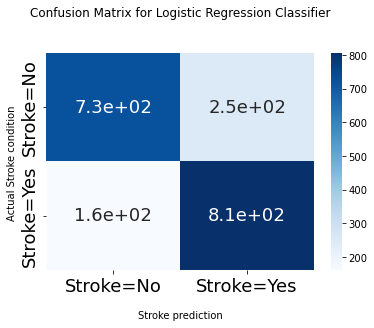

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       976
           1       0.76      0.83      0.80       968

    accuracy                           0.79      1944
   macro avg       0.79      0.79      0.79      1944
weighted avg       0.79      0.79      0.79      1944

AUC for Logistic Regression classifier is: 0.8498763717653435


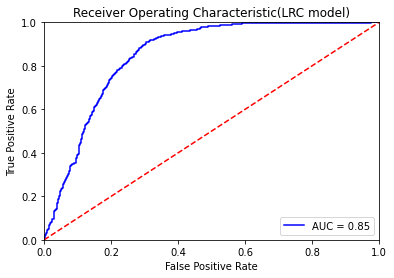

In [264]:
# LRC model performance testing with oversampled data

lrc_classifier = LogisticRegression(random_state = 1)
lrc_model = lrc_classifier.fit(X_train_os, y_train_os)
y_pred_lrc = lrc_classifier.predict(X_test_os)
y_pred_lrc
# Get the confusion matrix
cf_matrix_lrc = confusion_matrix(y_test_os, y_pred_lrc)
print('Confusion Matrix - LRC')
print(cf_matrix_lrc)

cf_matrix_plot = sns.heatmap(cf_matrix_lrc, annot=True, cmap='Blues',annot_kws={"fontsize":18})

cf_matrix_plot.set_title('Confusion Matrix for Logistic Regression Classifier\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

# Ticket labels 
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)

# Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test_os, y_pred_lrc))

class_probabilities = lrc_model.predict_proba(X_test_os)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test_os, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for Logistic Regression classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(LRC model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Confusion Matrix - SVM
[[1198    0]
 [  80    0]]


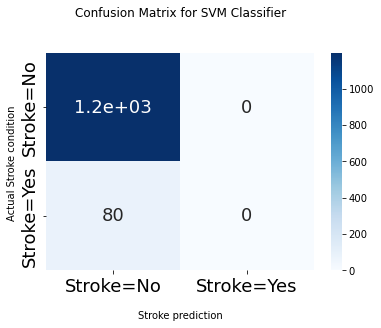

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278

AUC for SVM classifier is: 0.4173935726210351


C:\Users\samru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\samru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\samru\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



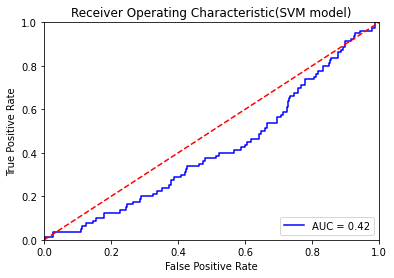

In [265]:
# SVM Classifier

from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0,probability=True) #class_weight='balanced',
svm_model = classifier_svc.fit(X_train, y_train)
y_pred_svm = classifier_svc.predict(X_test)
y_pred_svm
# Get the confusion matrix
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix - SVM')
print(cf_matrix_svm)

cf_matrix_plot = sns.heatmap(cf_matrix_svm, annot=True, cmap='Blues',annot_kws={"fontsize":18})

cf_matrix_plot.set_title('Confusion Matrix for SVM Classifier\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

# Ticket labels 
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)

# Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, y_pred_svm))

class_probabilities = svm_model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for SVM classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(SVM model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix - SVM
[[711 265]
 [127 841]]


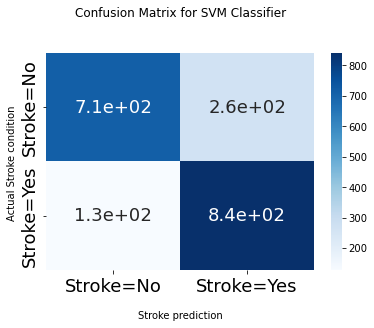

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       976
           1       0.76      0.87      0.81       968

    accuracy                           0.80      1944
   macro avg       0.80      0.80      0.80      1944
weighted avg       0.80      0.80      0.80      1944

AUC for SVM classifier is: 0.8517853060222191


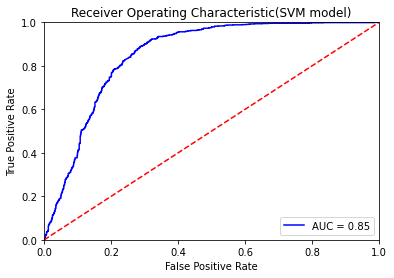

In [266]:
# SVM model performance testing with oversampled data

classifier_svc = SVC(kernel = 'linear', random_state = 0,probability=True) #class_weight='balanced',
svm_model = classifier_svc.fit(X_train_os, y_train_os)
y_pred_svm = classifier_svc.predict(X_test_os)
y_pred_svm

# Get the confusion matrix
cf_matrix_svm = confusion_matrix(y_test_os, y_pred_svm)
print('Confusion Matrix - SVM')
print(cf_matrix_svm)

cf_matrix_plot = sns.heatmap(cf_matrix_svm, annot=True, cmap='Blues',annot_kws={"fontsize":18})

cf_matrix_plot.set_title('Confusion Matrix for SVM Classifier\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

# Ticket labels 
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)

# Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test_os, y_pred_svm))

class_probabilities = svm_model.predict_proba(X_test_os)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test_os, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for SVM classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(SVM model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [267]:
# !pip install mlxtend

Confusion Matrix - RF
[[1197    1]
 [  80    0]]


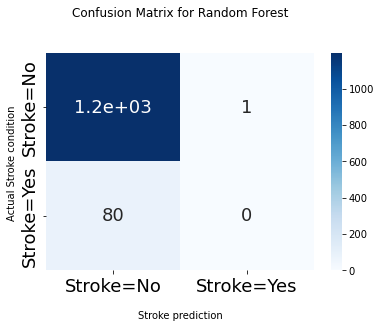

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278

AUC for Random Forest classifier is: 0.7967810934891485


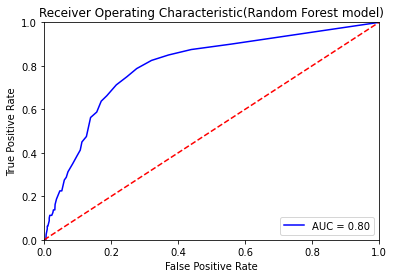

In [268]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier( random_state=0)
rf_model = classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)
y_pred_rf
# Get the confusion matrix
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix - RF')
print(cf_matrix_rf)

# Plotting Confusion matrix
cf_matrix_plot = sns.heatmap(cf_matrix_rf, annot=True, cmap='Blues',annot_kws={"fontsize":18})
cf_matrix_plot.set_title('Confusion Matrix for Random Forest\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

# Ticket labels - List must be in alphabetical order
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
plt.show()

print(classification_report(y_test, y_pred_rf))

class_probabilities = rf_model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for Random Forest classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(Random Forest model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix - RF
[[868 108]
 [ 26 942]]


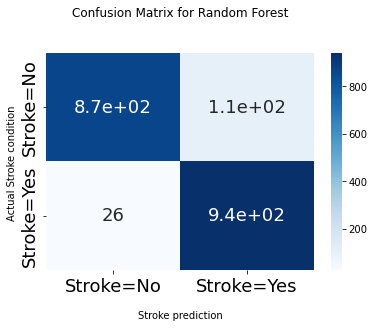

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       976
           1       0.90      0.97      0.93       968

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

AUC for Random Forest classifier is: 0.982222090502642


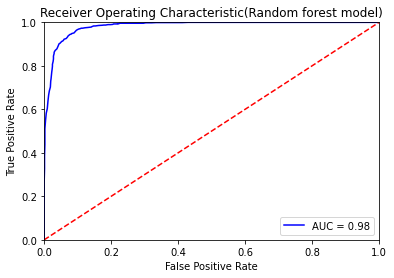

In [269]:
# Random Forest Classifier performance testing after oversampling

classifier_rf = RandomForestClassifier( random_state=0)
rf_model = classifier_rf.fit(X_train_os, y_train_os)
y_pred_rf = classifier_rf.predict(X_test_os)
y_pred_rf
# Get the confusion matrix
cf_matrix_rf = confusion_matrix(y_test_os, y_pred_rf)
print('Confusion Matrix - RF')
print(cf_matrix_rf)

# Plotting Confusion matrix
cf_matrix_plot = sns.heatmap(cf_matrix_rf, annot=True, cmap='Blues',annot_kws={"fontsize":18})
cf_matrix_plot.set_title('Confusion Matrix for Random Forest\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

# Ticket labels - List must be in alphabetical order
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
plt.show()

print(classification_report(y_test_os, y_pred_rf))

class_probabilities = rf_model.predict_proba(X_test_os)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test_os, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for Random Forest classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(Random forest model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix - RF
[[1151   47]
 [  69   11]]


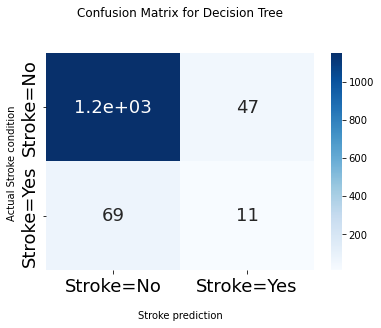

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1198
           1       0.19      0.14      0.16        80

    accuracy                           0.91      1278
   macro avg       0.57      0.55      0.56      1278
weighted avg       0.90      0.91      0.90      1278

AUC for Decision Trees classifier is: 0.5491339732888147


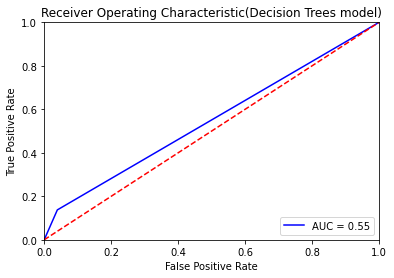

In [270]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt = DecisionTreeClassifier(random_state= 0)
dt_model = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_dt

# Get the confusion matrix
cf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix - RF')
print(cf_matrix_dt)

cf_matrix_plot = sns.heatmap(cf_matrix_dt, annot=True, cmap='Blues',annot_kws={"fontsize":18})

cf_matrix_plot.set_title('Confusion Matrix for Decision Tree\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

## Ticket labels - List must be in alphabetical order
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, y_pred_dt))

class_probabilities = dt_model.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for Decision Trees classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(Decision Trees model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# plt.figure(figsize=(50,50))
# tree.plot_tree(dt, filled= True,feature_names=X_train.columns, fontsize=10)

Confusion Matrix - RF
[[852 124]
 [115 853]]


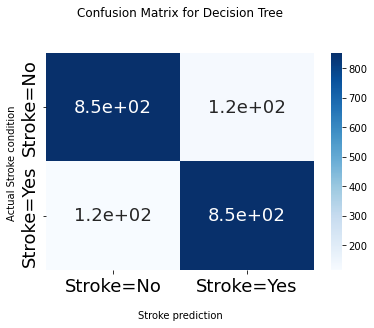

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       976
           1       0.87      0.88      0.88       968

    accuracy                           0.88      1944
   macro avg       0.88      0.88      0.88      1944
weighted avg       0.88      0.88      0.88      1944

AUC for Decision Trees classifier is: 0.8770745833897846


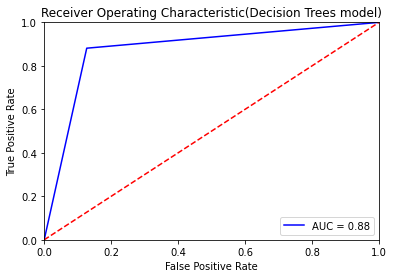

In [271]:
# Decision Trees Classifier performance testing after oversampling
dt = DecisionTreeClassifier(random_state= 0)
dt_model = dt.fit(X_train_os, y_train_os)
y_pred_dt = dt.predict(X_test_os)
y_pred_dt

# Get the confusion matrix
cf_matrix_dt = confusion_matrix(y_test_os, y_pred_dt)
print('Confusion Matrix - RF')
print(cf_matrix_dt)

cf_matrix_plot = sns.heatmap(cf_matrix_dt, annot=True, cmap='Blues',annot_kws={"fontsize":18})

cf_matrix_plot.set_title('Confusion Matrix for Decision Tree\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

# Ticket labels - List must be in alphabetical order
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)

# Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test_os, y_pred_dt))

class_probabilities = dt_model.predict_proba(X_test_os)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test_os, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for Decision Trees classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(Decision Trees model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [272]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# selecting top 10 features using chi-square test method
sel_chi2 = SelectKBest(chi2, k=10)    
X_train_chi2 = sel_chi2.fit_transform(X_train, y_train)
print(sel_chi2.get_support())

[False  True  True  True  True  True  True False  True False  True  True
  True False False]


In [273]:
X_test_chi2 = sel_chi2.transform(X_test)
print(X_test.shape)
print(X_test_chi2.shape)

(1278, 15)
(1278, 10)


Confusion Matrix - RF
[[1186   12]
 [  77    3]]


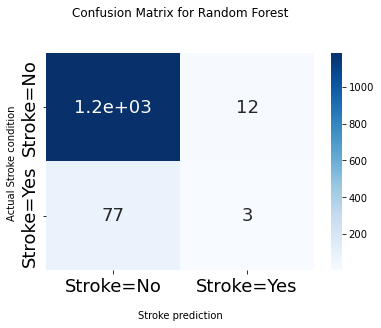

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1198
           1       0.20      0.04      0.06        80

    accuracy                           0.93      1278
   macro avg       0.57      0.51      0.51      1278
weighted avg       0.89      0.93      0.91      1278

AUC for Random Forest classifier is: 0.7708785475792989


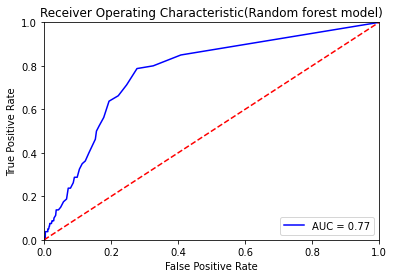

In [274]:
# Random Forest Classifier performance testing after feature selection

classifier_rf = RandomForestClassifier( random_state=0)
rf_model = classifier_rf.fit(X_train_chi2, y_train)
y_pred_rf = classifier_rf.predict(X_test_chi2)
y_pred_rf
# Get the confusion matrix
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix - RF')
print(cf_matrix_rf)

# Plotting Confusion matrix
cf_matrix_plot = sns.heatmap(cf_matrix_rf, annot=True, cmap='Blues',annot_kws={"fontsize":18})
cf_matrix_plot.set_title('Confusion Matrix for Random Forest\n\n');
cf_matrix_plot.set_xlabel('\nStroke prediction')
cf_matrix_plot.set_ylabel('Actual Stroke condition ');

# Ticket labels - List must be in alphabetical order
cf_matrix_plot.xaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
cf_matrix_plot.yaxis.set_ticklabels(['Stroke=No','Stroke=Yes'],fontsize = 18)
plt.show()

print(classification_report(y_test, y_pred_rf))

class_probabilities = rf_model.predict_proba(X_test_chi2)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for Random Forest classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic(Random forest model)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()